In [ ]:
#Analysis of Participants' segmentation response while reading the stories

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.plotly as py
import plotly
import os
import glob
import math
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

plotly.tools.set_credentials_file(username='amr7', api_key='4gj9vxlD7C63cCRCaRdU')

#iMac
#directory = '/Users/alexreblando/Library/Mobile Documents/com~apple~CloudDocs/Documents/GitHub/ebs/usable_data'

########################first pilot data#########################################
#laptop
#directory = '/Users/alexreblando/Documents/GitHub/ebs/usable_data'
#directory_stories = '/Users/alexreblando/Documents/GitHub/ebs/story_xlsx_files'
    #old stories
#directory_stories = '/Users/alexreblando/Downloads/ebs-master/story_xlsx_files'

#####################second pilot data#############################################
#laptop
directory = '/Users/alexreblando/Documents/GitHub/ebs/pilot2/usable_data_pilot2'
directory_stories = '/Users/alexreblando/Documents/GitHub/ebs/pilot2/pilot2_story_xlsx_files'

filenames = glob.glob(directory+ '/*.csv')
filenames_stories = glob.glob(directory_stories + '/*.xlsx')

dfs = []
dfs_stories = []
print(filenames)

for filename in filenames:
    dfs.append(pd.read_csv(filename))
    
for filename in filenames_stories:
    dfs_stories.append(pd.read_excel(filename))

['/Users/alexreblando/Documents/GitHub/ebs/pilot2/usable_data_pilot2/061419_p1_body_behavioural_2019_Jun_14_1401.csv', '/Users/alexreblando/Documents/GitHub/ebs/pilot2/usable_data_pilot2/061919_p1_body_behavioural_2019_Jun_19_1736.csv', '/Users/alexreblando/Documents/GitHub/ebs/pilot2/usable_data_pilot2/062019_p1_body_behavioural_2019_Jun_20_1023.csv', '/Users/alexreblando/Documents/GitHub/ebs/pilot2/usable_data_pilot2/062019_p2_body_behavioural_2019_Jun_20_1433.csv', '/Users/alexreblando/Documents/GitHub/ebs/pilot2/usable_data_pilot2/062119_p1_body_behavioural_2019_Jun_21_1520.csv', '/Users/alexreblando/Documents/GitHub/ebs/pilot2/usable_data_pilot2/062419_p1_body_behavioural_2019_Jun_24_1520.csv', '/Users/alexreblando/Documents/GitHub/ebs/pilot2/usable_data_pilot2/062519_p1_body_behavioural_2019_Jun_25_1044.csv', '/Users/alexreblando/Documents/GitHub/ebs/pilot2/usable_data_pilot2/062519_p2_body_behavioural_2019_Jun_25_1339.csv', '/Users/alexreblando/Documents/GitHub/ebs/pilot2/usable

In [2]:
#create a dictionary for each participant, documenting which stories they read paired with the schema 
#they were assigned for that story
size_dfs = len(dfs)
participants = dict()

for s in range(size_dfs):
    this_dict = dict()
    story_list = dfs[s]['order of stories'].iloc[0].split(' ')
    story_list = [elem.replace("[","").replace("]","") for elem in story_list]
    schema_list = dfs[s]['order of perspectives'].iloc[0].split(' ')
    schema_list = [elem.replace("[","").replace("]","") for elem in schema_list]
    schema_list = [elem.replace("\n","") for elem in schema_list]
    schema_list = [elem.replace("'","") for elem in schema_list]
    this_p = dfs[s]['participant'].iloc[0]
    for i in range(8):
        final_dict = {
            'story':story_list[i],
            'schema':schema_list[i],
        }
        
        this_dict[i+1] = final_dict
        
    participants[this_p] = this_dict



In [3]:
#create a dictionary for the answers to the 8 questions for each story, not parsing the questions 
#by primed or unprimed

question_answers = dict()

for s in range(size_dfs):
    story_list = dfs[s]['order of stories'].iloc[0].split(' ')
    story_list = [elem.replace("[","").replace("]","") for elem in story_list]
    schema_list = dfs[s]['order of perspectives'].iloc[0].split(' ')
    schema_list = [elem.replace("[","").replace("]","") for elem in schema_list]
    schema_list = [elem.replace("\n","") for elem in schema_list]
    schema_list = [elem.replace("'","") for elem in schema_list]
    #if the data file has a question portion
    if 'question1_answer' in dfs[s].columns:
        
        #get the question order of the stories ("primed v not-primed first")
        question_order = dfs[s]['order of question']
        which_one = pd.notna(question_order)
        question_order_list = []
        for k in range(len(question_order)):
            if which_one[k] == True:
                question_order_list.append(question_order[k])  
        
        #loop through all the stories 
        for i in range(8):
            new_questions = [dfs[s]['participant'].iloc[0], story_list[i], schema_list[i]]
            which_rows = dfs[s].loc[dfs[s]['count'] == i]
            tally_completed = 0
            #loop through all the questions
            for j in range(8):
                this_question = 'question'+str(j+1)+'_answer'
                which_cell = pd.notna(which_rows[this_question])
                any_answer = np.any(which_cell)
                if any_answer == False:
                    new_questions.append('')
                else:
                    for t in range(len(which_rows)):
                        if which_cell.iloc[t] == True:
                            hold = which_rows[this_question].iloc[t]
                            tally_completed = tally_completed + 1
                    new_questions.append(hold)
            
            #move the order of the stories, so that location questions always come first
            if tally_completed > 0:
                if question_order_list[i] == 'primed first' and schema_list[i] == 'Social':
                    temp = new_questions[3:12]
                    temp = np.roll(temp, 4)
                    new_questions[3:12] = temp
                if question_order_list[i] == 'non-primed first' and schema_list[i] == 'Location':
                    temp = new_questions[3:12]
                    temp = np.roll(temp, 4)
                    new_questions[3:12] = temp
                    
            #put all of the questions into dictionaries organized by story
            if story_list[i] in question_answers:
                question_answers[story_list[i]] = np.vstack((question_answers[story_list[i]], new_questions))
            else:
                question_answers[story_list[i]] = new_questions
                


In [6]:
#export each story answers to its own csv file
import csv

for key in question_answers:
    title = 'raw_recall/'+ key + '_recall_answers.csv'
    this_array = question_answers[key]
    with open(title, 'w') as csvfile:
        fieldnames = ['participant', 'story', 'schema', '1', '2', '3', '4','5', '6','7','8']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for i in range(len(this_array)):
            a = this_array[i, 0]
            b = this_array[i, 1]
            c = this_array[i, 2]
            d = this_array[i, 3]
            e = this_array[i, 4]
            f = this_array[i, 5]
            g = this_array[i, 6]
            h = this_array[i, 7]
            j = this_array[i, 8]
            k = this_array[i, 9]
            l = this_array[i, 10]
            writer.writerow({'participant': a, 'story': b, 'schema': c, '1': d, '2': e, '3': f, '4':g, '5':h, '6':j, '7':k,'8':l})

            
        

In [7]:
dfs_stories[s]['story'].iloc[0]

43.0

In [4]:
#return participants who have read a particular story
this_one = '42'

for key in participants:
    for key2 in participants[key]:
        if participants[key][key2]['story'] == this_one:
            print(key)
            print(participants[key][key2]['schema'])
            print(key2)

061419_p1
Social
1
062019_p2
Location
5
062119_p1
Social
6
062519_p2
Location
2
062619_p1
Location
1
062719_p2
Social
5
062819_p1
Social
1


In [5]:
#put all of the key presses into a dictionary, orginized by story
size_dfs = len(dfs)
loc_story_keys = dict()
soc_story_keys = dict()
for s in range(size_dfs):
    story_list = dfs[s]['order of stories'].iloc[0].split(' ')
    story_list = [elem.replace("[","").replace("]","") for elem in story_list]
    schema_list = dfs[s]['order of perspectives'].iloc[0].split(' ')
    schema_list = [elem.replace("[","").replace("]","") for elem in schema_list]
    schema_list = [elem.replace("\n","") for elem in schema_list]
    schema_list = [elem.replace("'","") for elem in schema_list]
    for i in range(8):
        keys = dfs[s]['story_presses.keys'].values[dfs[s]['count']==i]
        keys = keys[~np.isnan(keys)]
        if schema_list[i] == 'Location':
            if story_list[i] in loc_story_keys:
                loc_story_keys[story_list[i]] = np.concatenate((loc_story_keys[story_list[i]],keys[:,np.newaxis]), axis=1)
            else:
                loc_story_keys[story_list[i]] = keys[:, np.newaxis]
        elif schema_list[i] == 'Social':
            if story_list[i] in soc_story_keys:
                soc_story_keys[story_list[i]] = np.concatenate((soc_story_keys[story_list[i]],keys[:,np.newaxis]), axis=1)
            else:
                soc_story_keys[story_list[i]] = keys[:, np.newaxis]

In [6]:
#put all of the a priori story boundaries into a dictionary organized by story

all_story_priors = dict()

for s in range(16):
    this_story = str(int(dfs_stories[s]['story'].iloc[0]))
    keys2 = dfs_stories[s]['locationEvent'].values
    keys3 = dfs_stories[s]['socialEvent'].values
    all_story_priors[this_story] = keys2[:, np.newaxis]
    all_story_priors[this_story] = np.concatenate((all_story_priors[this_story], keys3[:, np.newaxis]), axis = 1)

In [7]:
#for participant responses, convert all '1' presses to 0 values, and '9' presses to 1 values

for key in soc_story_keys:
    this_array = soc_story_keys[key]
    this_array[this_array ==1] = 0
    this_array[this_array == 9] = 1
    soc_story_keys[key] = this_array
    
for key in loc_story_keys:
    this_array = loc_story_keys[key]
    this_array[this_array ==1] = 0
    this_array[this_array == 9] = 1
    loc_story_keys[key] = this_array
    


In [8]:
#sum the responses
loc_percent_story_keys = dict()
soc_percent_story_keys = dict()

for key in loc_story_keys:
    this_sum = np.sum(loc_story_keys[key], axis = 1)
    N = np.size(loc_story_keys[key],1)
    this_percent = this_sum/N
    loc_percent_story_keys[key] = this_percent[:, np.newaxis]
    
for key in soc_story_keys:
    this_sum = np.sum(soc_story_keys[key], axis = 1)
    N = np.size(soc_story_keys[key],1)
    this_percent = this_sum/N
    soc_percent_story_keys[key] = this_percent[:, np.newaxis]
    

In [9]:
#find the average number and standard deviation of participants in each story 
#also for story lengths

lengths = []
N = []

for key in loc_story_keys:
    x, y = loc_story_keys[key].shape
    x1, y1 = soc_story_keys[key].shape
    lengths.append(x)
    lengths.append(x1)
    N.append(y)
    N.append(y1)
    
length_mean = statistics.mean(lengths)
length_sd = statistics.stdev(lengths)

N_mean = statistics.mean(N)
N_sd = statistics.stdev(N)
print(length_mean, length_sd, N_mean, N_sd)

33.6875 4.215466912492919 3.75 0.762000762001143


In [10]:
#get the binary version of the a priori boundaries

for key in all_story_priors:
    location = all_story_priors[key][:,0]
    social = all_story_priors[key][:,1]
    for i in range(0, len(location)):  
        if location[i] > location[i-1]:
            location[i] = 7
    for i in range(0, len(location)):  
        if location[i] != 7:
            location[i] = 0
    for i in range(0, len(social)):
        if social[i] > social[i - 1]:
            social[i] = 7
    for i in range(0, len(social)):
        if social[i] != 7:
            social[i] = 0
    location[0] = 7
    social[0] = 7
    location2 = location > 1
    social2 = social > 1
    location2 = location2.astype(int)
    social2 = social2.astype(int)
    all_story_priors[key] = np.concatenate((all_story_priors[key], location2[:, np.newaxis]), axis = 1) 
    all_story_priors[key] = np.concatenate((all_story_priors[key], social2[:, np.newaxis]), axis = 1)

In [11]:
#show the stories
key = '44'
opacityPriors = 0.1

new_x = np.arange(len(all_story_priors[key]) + 1)
#new_x = np.delete(x_index, 0)
trace1 = go.Scatter(x = new_x, 
                y = all_story_priors[key][:,2], 
                mode = 'lines+markers', 
                name = 'location Event Starts',
                line = dict(
                    shape = 'hvh',
                    color = ('rgba(0, 204, 0, .05)'),
                    width = 4))

trace2 = go.Scatter(x = new_x, 
                y = all_story_priors[key][:,3], 
                mode = 'lines+markers', 
                name = 'social Event Starts',
                line = dict(
                    shape = 'hvh',
                    color = ('rgba(255, 91, 71, .05)'),
                    width = 4))

trace3 = go.Scatter(x = new_x, 
                    y = loc_percent_story_keys[key], 
                    mode = 'lines+markers', 
                    name = 'participant w location',
                    line = dict(
                        shape = 'hvh',
                        color = ('rgba(0, 191, 255, .5)'),
                        width = 4))

trace4 = go.Scatter(x = new_x, 
                    y = soc_percent_story_keys[key], 
                    mode = 'lines+markers', 
                    name = 'participants w social',
                    line = dict(
                        shape = 'hvh',
                        color = ('rgba(255, 215, 0, .5)'),
                        width = 4))


data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    title= key,
    xaxis=dict(
        title='Sentence Number',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f')
    ),
    yaxis=dict(
        autorange=True,
        showgrid=False,
        zeroline=False,
        showline=False,
        ticks='',
        showticklabels=False
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

/Users/alexreblando/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:694: UserWarning:

Consider using IPython.display.IFrame instead



In [12]:
#find the mean correlation of the responses of participants with the same schema for each story and store the
#value in a dictionary
soc_cor = dict()
loc_cor = dict()

for key in soc_story_keys:
    z = len(soc_story_keys[key][0])
    soc_this = np.nanmean(np.corrcoef(soc_story_keys[key].T)[np.triu(np.ones((z,z), dtype=np.bool),1)])
    soc_cor[key] = soc_this
    g = len(loc_story_keys[key][0])
    loc_this = np.nanmean(np.corrcoef(loc_story_keys[key].T)[np.triu(np.ones((g,g), dtype=np.bool),1)])
    loc_cor[key] = loc_this
    

for key in soc_cor:
    print(key)
    print('loc:', loc_cor[key])
    print('soc:', soc_cor[key])
    
loc_cor_avg = np.array(list(loc_cor.values())).mean()
soc_cor_avg = np.array(list(soc_cor.values())).mean()
combined_avg = (loc_cor_avg + soc_cor_avg)/2
print('loc_avg: ', loc_cor_avg)
print('soc_avg: ', soc_cor_avg)
print('general avg: ', combined_avg)

42
loc: 0.060695626145344246
soc: 0.40250152695822533
31
loc: 0.06749500466501156
soc: 0.2587767240428262
13
loc: -0.04183300132670376
soc: 0.28593189768948724
24
loc: 0.1434996672554522
soc: 0.2543090988885633
41
loc: 0.3195975619358779
soc: 0.023894702089775902
23
loc: 0.4013477403455524
soc: 0.25514210872774784
32
loc: 0.0875058798535601
soc: 0.27460269148056576
14
loc: 0.2193249015805496
soc: 0.3985660863440261
11
loc: 0.20944543428866122
soc: 0.22485793978282972
34
loc: 0.1637075617397991
soc: 0.2903814901853719
43
loc: 0.22194004549022747
soc: 0.3213822695249299
22
loc: 0.2881885598539961
soc: 0.09164577650763378
44
loc: 0.30248913630647867
soc: 0.30158730158730157
33
loc: 0.5375530013433446
soc: 0.27441383571653416
21
loc: 0.23397885394198986
soc: 0.0972110112225983
12
loc: 0.31799958915497245
soc: 0.24748356497507348
loc_avg:  0.2208084726608821
soc_avg:  0.2501680016077181
general avg:  0.23548823713430012


In [13]:
#find the averages of correlations across location schemas

loc_this_sum = loc_cor['11'] + loc_cor['21'] + loc_cor['31'] + loc_cor['41']
mean_loc = loc_this_sum/4
print(mean_loc)

0.20762921370788512


In [14]:
#find the averages of correlations across social schemas

soc_this_sum = soc_cor['11'] + soc_cor['12'] + soc_cor['13'] + soc_cor['14']
mean_soc = soc_this_sum/4
print(mean_soc)

0.28920987219785416


In [19]:
#correlation across the schemas 
isc_dict = dict()

for key in soc_story_keys:
    z = len(soc_story_keys[key][0])
    x = len(loc_story_keys[key][0])
    new = np.concatenate((soc_story_keys[key], loc_story_keys[key]), axis = 1)
    #permute new
    coef_matrix = np.corrcoef(new.T)
    this = coef_matrix[0:z,z:(z+x)]
    mean_isc = np.nanmean(this)
    isc_dict[key] = mean_isc
    
print(isc_dict)
isc_avg = np.array(list(isc_dict.values())).mean()
print('isc avg: ', isc_avg)

{'42': 0.19607904210823876, '31': 0.12254398088248875, '13': 0.2599630592422594, '24': 0.1683010645840487, '41': 0.1528691598196443, '23': 0.22217663794122544, '32': 0.2576697998470178, '14': 0.34910362357209074, '11': 0.23830097690958763, '34': 0.28892222573997806, '43': 0.2681641275425446, '22': 0.18680071300812476, '44': 0.3584002986577307, '33': 0.37079539175327125, '21': 0.2591682574535247, '12': 0.33883093631325206}
isc avg:  0.25238058096093924


In [20]:
#SFN ABSTRACT ANALYSIS 2 4.30.19
#ANALYSIS 001
#AVG CORRELATION OF KEY PRESSES OF SOCIAL-PRIMED PARTICIPANTS - AVG CORRELATION OF KEY PRESSES OF SOCIAL + LOCATION 
#PRIMED PARTICIPANTS
#AVG OF SAME PRIMED PARTICIPANTS IS COMPUTED ONCE AT THE END, NOT TWICE, FIRST FOR EACH GROUP, THEN ACROSS SOCIAL
#AND LOCATION

correl_dif_dict = dict()

for key in soc_story_keys:
    z = len(soc_story_keys[key][0])
    x = len(loc_story_keys[key][0])
    new = np.concatenate((soc_story_keys[key], loc_story_keys[key]), axis = 1)
    coef_matrix = np.corrcoef(new.T)
    this = coef_matrix[0:z,z:(z+x)]
    mean_isc = np.nanmean(this)
    soc_correl = coef_matrix[0:z, 0:z][np.triu(np.ones((z,z), dtype=np.bool),1)]
    loc_correl = coef_matrix[z:(z+x), z:(z+x)][np.triu(np.ones((x,x), dtype=np.bool),1)]
    correls= np.concatenate((soc_correl, loc_correl), axis = None)
    mean_correl = np.nanmean(correls)
    story_value = mean_correl - mean_isc
    correl_dif_dict[key] = story_value
    

print(correl_dif_dict)
observed_correl_dif = np.array(list(correl_dif_dict.values())).mean()
print('soc/soc + loc/loc cor - soc/loc cor', observed_correl_dif)

{'42': 0.09248718457902619, '31': 0.07247217003439926, '13': -0.0038279705542440534, '24': 0.0490715570934776, '41': -0.030406837781167734, '23': 0.13043589186505855, '32': -0.04543271224212064, '14': -0.010284598815890111, '11': -0.02114928987384221, '34': -0.061877699777392464, '43': 0.0034970299650341485, '22': 0.0031164551726901857, '44': -0.05611927805567757, '33': 0.1060331867531169, '21': -0.05675121336985589, '12': -0.03710427581517939}
soc/soc + loc/loc cor - soc/loc cor 0.008384974948589549


In [21]:
#SFN ABSTRACT ANALYSIS 2 4.30.19
#ANALYSIS 002
#PERMUTATION: AVG CORRELATION OF KEY PRESSES OF SOCIAL-PRIMED PARTICIPANTS - AVG CORRELATION OF KEY PRESSES OF SOCIAL + LOCATION 
#PRIMED PARTICIPANTS
#AVG OF SAME PRIMED PARTICIPANTS IS COMPUTED ONCE AT THE END, NOT TWICE, FIRST FOR EACH GROUP, THEN ACROSS SOCIAL
#AND LOCATION

permutes = []

for i in range(0, 1000):
    correl_dif_dict = dict()
    for key in soc_story_keys:
        z = len(soc_story_keys[key][0])
        x = len(loc_story_keys[key][0])
        new = np.concatenate((soc_story_keys[key], loc_story_keys[key]), axis = 1)
        #permute new
        this_perm = new[:, np.random.permutation(new.shape[1])]
        #this_perm = np.random.permutation(new)
        coef_matrix = np.corrcoef(this_perm.T)
        this = coef_matrix[0:z,z:(z+x)]
        mean_isc = np.nanmean(this)
        soc_correl = coef_matrix[0:z, 0:z][np.triu(np.ones((z,z), dtype=np.bool),1)]
        loc_correl = coef_matrix[z:(z+x), z:(z+x)][np.triu(np.ones((x,x), dtype=np.bool),1)]
        correls= np.concatenate((soc_correl, loc_correl), axis = None)
        mean_correl = np.nanmean(correls)
        story_value = mean_correl - mean_isc
        correl_dif_dict[key] = story_value
    this_avg = np.array(list(correl_dif_dict.values())).mean()
    permutes.append(this_avg)


    

In [22]:
#pvalue

p_value_correl_dif = sum(i > observed_correl_dif for i in permutes)/1000
print('p = ', p_value_correl_dif)

p =  0.346


Text(0.5, 1.0, 'Correlation of Boundaries Difference Between Similarly Primed and Differently Primed Participants w/out 11 ')

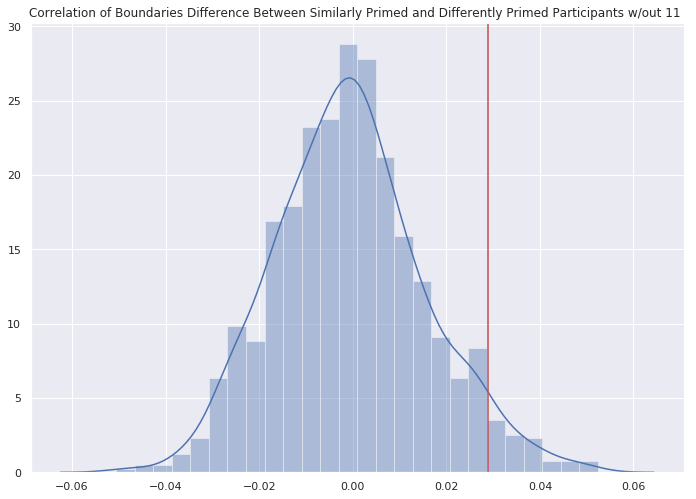

In [224]:
##plot the permutes
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(permutes)
plt.axvline(observed_correl_dif, 0,30, color = 'r')
plt.title('Correlation of Boundaries Difference Between Similarly Primed and Differently Primed Participants w/out 11 ')

In [225]:
#SFN ABSTRACT ANALYSIS 1 4.29.19
#NOT USING
#AVG CORRELATION OF KEY PRESSES OF SOCIAL-PRIMED PARTICIPANTS - AVG CORRELATION OF KEY PRESSES OF SOCIAL + LOCATION 
#PRIMED PARTICIPANTS
cor_this = dict()


for key in isc_dict:
    print(soc_cor[key], 'soc_cor')
    print(isc_dict[key], 'isc_cor')
    s = (soc_cor[key] + loc_cor[key])/2 - isc_dict[key]
    cor_this[key] = s

    
    
    
print(cor_this)
print('soc/soc + loc/loc cor - soc/loc cor', np.array(list(cor_this.values())).mean())


0.1577916642824127 soc_cor
0.25664832661326425 isc_cor
0.3302002762169798 soc_cor
0.38817565595027176 isc_cor
0.3545245679456396 soc_cor
0.20043573877826265 isc_cor
0.2336487172178229 soc_cor
0.15119165888307928 isc_cor
0.20985257489672077 soc_cor
0.19438594801316078 isc_cor
0.21468811705803534 soc_cor
0.24783198743442642 isc_cor
0.1433510385893565 soc_cor
0.11318534025583046 isc_cor
0.16894675451510968 soc_cor
0.17222516231954957 isc_cor
0.24042685608175898 soc_cor
0.34683027578511294 isc_cor
0.11916350888251724 soc_cor
0.18540924799423916 isc_cor
0.19523681250099525 soc_cor
0.15655942054250466 isc_cor
0.46291855274635 soc_cor
0.4198602962574182 isc_cor
0.18156825980064079 soc_cor
0.23352754960792155 isc_cor
0.1932993111817978 soc_cor
0.20204691261880536 isc_cor
0.21484985796747316 soc_cor
0.17746907126500122 isc_cor
0.09966453255402896 soc_cor
0.16184556064948866 isc_cor
{'12': -0.07797559202491355, '31': -0.05081064631522353, '43': 0.06102262396825858, '24': 0.03795119221856269, '23

In [226]:
#SFN ABSTRACT ANALYSIS 2 4.30.19 



#removing story 11 which will definitely be changed for the actual experiment


#ANALYSIS 001
#AVG CORRELATION OF KEY PRESSES OF SOCIAL-PRIMED PARTICIPANTS - AVG CORRELATION OF KEY PRESSES OF SOCIAL + LOCATION 
#PRIMED PARTICIPANTS
#AVG OF SAME PRIMED PARTICIPANTS IS COMPUTED ONCE AT THE END, NOT TWICE, FIRST FOR EACH GROUP, THEN ACROSS SOCIAL
#AND LOCATION

correl_dif_dict = dict()

for key in soc_story_keys:
    if key == '11':
        pass
    else:    
        z = len(soc_story_keys[key][0])
        x = len(loc_story_keys[key][0])
        new = np.concatenate((soc_story_keys[key], loc_story_keys[key]), axis = 1)
        coef_matrix = np.corrcoef(new.T)
        this = coef_matrix[0:z,z:(z+x)]
        mean_isc = np.nanmean(this)
        soc_correl = coef_matrix[0:z, 0:z][np.triu(np.ones((z,z), dtype=np.bool),1)]
        loc_correl = coef_matrix[z:(z+x), z:(z+x)][np.triu(np.ones((x,x), dtype=np.bool),1)]
        correls= np.concatenate((soc_correl, loc_correl), axis = None)
        mean_correl = np.nanmean(correls)
        story_value = mean_correl - mean_isc
        correl_dif_dict[key] = story_value
    

print(correl_dif_dict)
observed_correl_dif = np.array(list(correl_dif_dict.values())).mean()
print('soc/soc + loc/loc cor - soc/loc cor', observed_correl_dif)

{'12': -0.07056617998087097, '31': -0.04503263549420061, '43': 0.11272607130110207, '24': 0.059032918273595775, '23': 0.08080740812816223, '32': 0.040296310736634006, '44': 0.16135645730321332, '21': -0.06580277194293604, '33': -0.06724114978867843, '42': 0.02710295203171534, '14': 0.04643047872918077, '13': 0.019707653919045554, '41': 0.05234767856683725, '34': 0.0611493376333635, '22': 0.07195612648084526}
soc/soc + loc/loc cor - soc/loc cor 0.032284710393133936


In [227]:
#SFN ABSTRACT ANALYSIS 2 4.30.19




#no story 11


#ANALYSIS 002
#PERMUTATION: AVG CORRELATION OF KEY PRESSES OF SOCIAL-PRIMED PARTICIPANTS - AVG CORRELATION OF KEY PRESSES OF SOCIAL + LOCATION 
#PRIMED PARTICIPANTS
#AVG OF SAME PRIMED PARTICIPANTS IS COMPUTED ONCE AT THE END, NOT TWICE, FIRST FOR EACH GROUP, THEN ACROSS SOCIAL
#AND LOCATION

permutes = []

for i in range(0, 1000):
    correl_dif_dict = dict()
    for key in soc_story_keys:
        if key == '11':
            pass
        else:  
            z = len(soc_story_keys[key][0])
            x = len(loc_story_keys[key][0])
            new = np.concatenate((soc_story_keys[key], loc_story_keys[key]), axis = 1)
            #permute new
            this_perm = new[:, np.random.permutation(new.shape[1])]
            #this_perm = np.random.permutation(new)
            coef_matrix = np.corrcoef(this_perm.T)
            this = coef_matrix[0:z,z:(z+x)]
            mean_isc = np.nanmean(this)
            soc_correl = coef_matrix[0:z, 0:z][np.triu(np.ones((z,z), dtype=np.bool),1)]
            loc_correl = coef_matrix[z:(z+x), z:(z+x)][np.triu(np.ones((x,x), dtype=np.bool),1)]
            correls= np.concatenate((soc_correl, loc_correl), axis = None)
            mean_correl = np.nanmean(correls)
            story_value = mean_correl - mean_isc
            correl_dif_dict[key] = story_value
    this_avg = np.array(list(correl_dif_dict.values())).mean()
    permutes.append(this_avg)



In [228]:
#pvalue


#no 11

p_value_correl_dif = sum(i > observed_correl_dif for i in permutes)/1000
print('p = ', p_value_correl_dif)

p =  0.029


Text(0.5, 1.0, 'Correlation of Boundaries Difference Between Similarly Primed and Differently Primed Participants w/out 11 ')

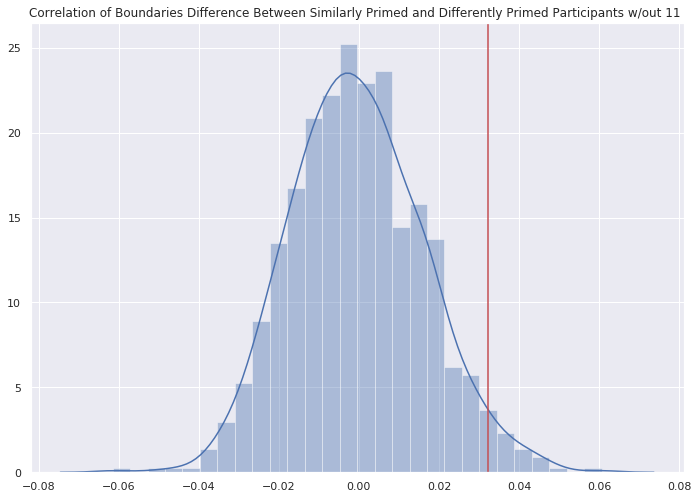

In [229]:
##plot the permutes
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(permutes)
plt.axvline(observed_correl_dif, 0,30, color = 'r')
plt.title('Correlation of Boundaries Difference Between Similarly Primed and Differently Primed Participants w/out 11 ')

In [28]:
#SFN ANALYSIS 3 4.30.19
#ANALYSIS 003
#INTERSECTION OVER UNION 

#actual


iu_dict = dict()

for key in soc_story_keys:
    #print('key', key)
    z = len(soc_story_keys[key][0])
    x = len(loc_story_keys[key][0])
    new = np.concatenate((soc_story_keys[key], loc_story_keys[key]), axis = 1)
    #print('key', key, '\n', z, x, '\n', new)
    new_t = new.T
    numerator_sum = np.dot(new_t, new)
    m, n = numerator_sum.shape
    #print('numerator', '\n',numerator_sum)
    denom = np.zeros((m,m))
    for i in range(0, m):
        for j in range(0, m):
            sum_col = new[:,i] + new[:, j]
            #if i == 1 and j == 2:
                #print(j, sum_col)
            denom_val = np.sum(np.minimum(sum_col, 1))
            denom[i, j] = denom_val
    #divide the intersection matrix by the denominator matrix
    #print('denom\n', denom)
    i_u_matrix = numerator_sum/denom
    print(key, i_u_matrix)
    #dif between differently and same primed participants
        #avg i/u of differently primed participants
    this_iu = i_u_matrix[0:z,z:(z+x)]
    mean_this_iu = np.nanmean(this_iu)
    soc_i_u = i_u_matrix[0:z, 0:z][np.triu(np.ones((z,z), dtype=np.bool),1)]
    loc_i_u = i_u_matrix[z:(z+x), z:(z+x)][np.triu(np.ones((x,x), dtype=np.bool),1)]
    i_u_s= np.concatenate((soc_i_u, loc_i_u), axis = None)
    mean_i_u = np.nanmean(i_u_s)
    iu_value = mean_i_u - mean_this_iu
    iu_dict[key] = iu_value
            
#print('\n\n\n\n\n\n\n\n\n\n\n\n\n')
print(iu_dict)







42 [[1.         0.36363636 0.44444444 0.27272727 0.44444444 0.
  0.1       ]
 [0.36363636 1.         0.28571429 0.58333333 0.38461538 0.
  0.23076923]
 [0.44444444 0.28571429 1.         0.21428571 0.33333333 0.1
  0.16666667]
 [0.27272727 0.58333333 0.21428571 1.         0.54545455 0.
  0.36363636]
 [0.44444444 0.38461538 0.33333333 0.54545455 1.         0.
  0.4       ]
 [0.         0.         0.1        0.         0.         1.
  0.        ]
 [0.1        0.23076923 0.16666667 0.36363636 0.4        0.
  1.        ]]
31 [[1.         0.41666667 0.08333333 0.3        0.45454545 0.1
  0.15384615]
 [0.41666667 1.         0.07692308 0.55555556 0.7        0.
  0.14285714]
 [0.08333333 0.07692308 1.         0.11111111 0.08333333 0.
  0.        ]
 [0.3        0.55555556 0.11111111 1.         0.44444444 0.
  0.09090909]
 [0.45454545 0.7        0.08333333 0.44444444 1.         0.
  0.25      ]
 [0.1        0.         0.         0.         0.         1.
  0.11111111]
 [0.15384615 0.14285714 0.   

In [29]:
key

'12'

In [30]:
#SFN ANALYSIS 3 4.30.19
#ANALYSIS 003
#INTERSECTION OVER UNION 



#PERMUTATION TEST

iu_permutes = []

for i in range(0, 1000):
    iu_dict = dict()
    for key in soc_story_keys:
        z = len(soc_story_keys[key][0])
        x = len(loc_story_keys[key][0])
        new = np.concatenate((soc_story_keys[key], loc_story_keys[key]), axis = 1)
        #perm new
        this_perm = new[:, np.random.permutation(new.shape[1])]
        #print('key', key, '\n', new)
        new_t = this_perm.T
        numerator_sum = np.dot(new_t, this_perm)
        m, n = numerator_sum.shape
        #print('numerator', '\n',numerator_sum)
        denom = np.zeros((m,m))
        for i in range(0, m):
            for j in range(0, m):
                sum_col = this_perm[:,i] + this_perm[:, j]
                denom_val = np.sum(np.minimum(sum_col, 1))
                denom[i, j] = denom_val
        #divide the intersection matrix by the denominator matrix
        #print('denom\n', denom)
        i_u_matrix = numerator_sum/denom
        #print(key, i_u_matrix)
        #dif between differently and same primed participants
            #avg i/u of differently primed participants
        this_iu = i_u_matrix[0:z,z:(z+x)]
        mean_this_iu = np.nanmean(this_iu)
        soc_i_u = i_u_matrix[0:z, 0:z][np.triu(np.ones((z,z), dtype=np.bool),1)]
        loc_i_u = i_u_matrix[z:(z+x), z:(z+x)][np.triu(np.ones((x,x), dtype=np.bool),1)]
        i_u_s= np.concatenate((soc_i_u, loc_i_u), axis = None)
        mean_i_u = np.nanmean(i_u_s)
        iu_value = mean_i_u - mean_this_iu
        iu_dict[key] = iu_value
    this_avg_iu = np.array(list(iu_dict.values())).mean()
    iu_permutes.append(this_avg_iu)
            


In [32]:
#pvalue


p_value_iu = sum(i > this_avg_iu for i in iu_permutes)/1000
print('p = ', p_value_iu)

p =  0.768


Text(0.5, 1.0, 'Intersection over Union Permutation Test')

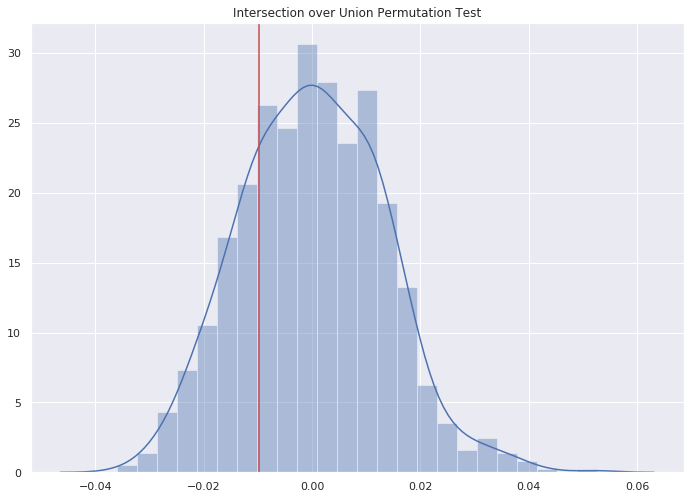

In [33]:
##plot the permutes
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(iu_permutes)
plt.axvline(this_avg_iu, 0,30, color = 'r')
plt.title('Intersection over Union Permutation Test')

In [48]:
#CORRELATION BETWEEN SOCIAL PRIMED RESPONSES/A PRIORI SOCIAL BOUNDARIES - LOCATION PRIMED RESPONSES/A PRIORI SOCIAL BOUNDARIES
#CORRELATION BETWEEN LOCATION PRIMED RESPONSES/A PRIORI LOCATION BOUNDARIES - SOCIAL PRIMED RESPONSES/A PRIORI LOCATION BOUNDARIES
#SFN analysis 4.29.19
#find the correlation between all participants' event boundaries and a priori boundaries
soc_a_priori_corr_dict = dict()
loc_a_priori_corr_dict = dict()

for key in soc_story_keys:
    #concatenate the key presses for social and location primed participants for each story
    new = np.concatenate((soc_story_keys[key], loc_story_keys[key]), axis = 1)
    #make a priori boundaries into columns
    loc = [[i] for i in all_story_priors[key][:,2]]
    soc = [[i] for i in all_story_priors[key][:,3]]
    #concatenate key presses w a priori boundaries
    loc_new = np.hstack((loc_story_keys[key], loc))
    soc_new = np.hstack((soc_story_keys[key], soc))
    #generate correlation matrix
    loc_coef_matrix = np.corrcoef(loc_new.T)
    soc_coef_matrix = np.corrcoef(soc_new.T)
    #take the last row
    loc_line = loc_coef_matrix[(len(loc_coef_matrix) - 1), :]
    soc_line = soc_coef_matrix[(len(loc_coef_matrix) - 1), :]
    #remove the last element
    loc_record = loc_line[:-1]
    soc_record = soc_line[:-1]
    #average the values
    avg_loc = np.nanmean(loc_record)
    avg_soc = np.nanmean(soc_record)
    #put in the dictionary
    a_priori_corr_dict[key] = [avg_loc, avg_soc]

    
a_priori_corr_dict

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [23]:
loc = [[i] for i in all_story_priors['11'][:,2]]
print(loc, len(loc))
print(loc_story_keys['11'], len(loc_story_keys['11']))
loc_new = np.hstack((loc_story_keys['12'], loc))
print(loc_new)

[[1.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [1.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [1.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [1.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]] 59
[[1. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [1. 0.

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [24]:
#I THINK THIS IS A BAD ANALYSIS BC I SHOULD ONLY BE CORRELATION THE A PRIORI BOUNDARIES OF SOCIAL SCRIPT TO SOCIAL PRIMED 
#PARTICIPANTS
#find the correlation between all participants' event boundaries and a priori boundaries
a_priori_corr_dict = dict()

for key in soc_story_keys:
    #concatenate the key presses for social and location primed participants for each story
    new = np.concatenate((soc_story_keys[key], loc_story_keys[key]), axis = 1)
    #make a priori boundaries into columns
    loc = [[i] for i in all_story_priors[key][:,2]]
    soc = [[i] for i in all_story_priors[key][:,3]]
    #concatenate key presses w a priori boundaries
    loc_new = np.hstack((new, loc))
    soc_new = np.hstack((new, soc))
    #generate correlation matrix
    loc_coef_matrix = np.corrcoef(loc_new.T)
    soc_coef_matrix = np.corrcoef(soc_new.T)
    #take the last row
    loc_line = loc_coef_matrix[(len(loc_coef_matrix) - 1), :]
    soc_line = soc_coef_matrix[(len(loc_coef_matrix) - 1), :]
    #remove the last element
    loc_record = loc_line[:-1]
    soc_record = soc_line[:-1]
    #average the values
    avg_loc = np.nanmean(loc_record)
    avg_soc = np.nanmean(soc_record)
    #put in the dictionary
    a_priori_corr_dict[key] = [avg_loc, avg_soc]

    
a_priori_corr_dict

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [56]:
all_story_priors['11']

array([[7, 7, 1, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [7, 0, 1, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 7, 0, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [7, 0, 1, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 7, 0, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [7, 0, 1, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 7, 0, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [69]:
#find the correlation between event boundaries of participants primed with location schemas and a priori boundaries
loc_a_priori_corr_dict = dict()
soc_primed_to_loc_a_priori = dict()
loc_primed_to_loc_a_priori = dict()

for key in soc_story_keys:
    #make a priori boundaries into columns
    loc = [[i] for i in all_story_priors[key][:,2]]
    soc = [[i] for i in all_story_priors[key][:,3]]
    #concatenate key presses w a priori boundaries
    loc_new = np.hstack((loc_story_keys[key], loc))
    soc_new = np.hstack((loc_story_keys[key], soc))
    #generate correlation matrix
    loc_coef_matrix = np.corrcoef(loc_new.T)
    soc_coef_matrix = np.corrcoef(soc_new.T)
    #take the last row
    loc_line = loc_coef_matrix[(len(loc_coef_matrix) - 1), :]
    soc_line = soc_coef_matrix[(len(loc_coef_matrix) - 1), :]
    #remove the last element
    loc_record = loc_line[:-1]
    soc_record = soc_line[:-1]
    #average the values
    avg_loc = np.nanmean(loc_record)
    avg_soc = np.nanmean(soc_record)
    #put in the dictionary
    loc_a_priori_corr_dict[key] = [avg_loc, avg_soc]
    soc_primed_to_loc_a_priori[key] = avg_soc
    loc_primed_to_loc_a_priori[key] = avg_loc

    


In [73]:
print('soc primed to loc boundaries: ', soc_primed_to_loc_a_priori)
print('loc primed to loc boundaries: ', loc_primed_to_loc_a_priori)
soc_loc_avg = np.array(list(soc_primed_to_loc_a_priori.values())).mean()
print('soc-loc avg: ', soc_loc_avg)
loc_loc_avg = np.array(list(loc_primed_to_loc_a_priori.values())).mean()
print('loc-loc avg: ', loc_loc_avg)

soc primed to loc boundaries:  {'42': 0.06481371872648087, '31': 0.1376246230080923, '13': 0.14146767246824216, '24': 0.22075246149948813, '41': 0.3657378696444351, '23': 0.24224020413885544, '32': 0.2942374486868962, '14': 0.4777474080228508, '11': 0.36284438806603986, '34': 0.2680948069327058, '43': 0.4101832017257807, '22': 0.16232844071145824, '44': 0.3965100897603962, '33': 0.09572582582135788, '21': 0.2546129543192367, '12': 0.31880563218167557}
loc primed to loc boundaries:  {'42': 0.171116226760326, '31': 0.1340248838780643, '13': 0.24979547957751336, '24': 0.3307134850008721, '41': 0.3514119331966055, '23': 0.34098124671850993, '32': 0.2342905996981622, '14': 0.289847547697547, '11': 0.21303237555957785, '34': 0.285579481566671, '43': 0.29319986327137115, '22': 0.36011306166692747, '44': 0.4376704240596812, '33': 0.5629506264595161, '21': 0.30132455234589556, '12': 0.43217032718533294}
soc-loc avg:  0.2633579216071245
loc-loc avg:  0.3117638821651609


In [61]:
#find the correlation between event boundaries of participants primed with social schemas and a priori boundaries
soc_a_priori_corr_dict = dict()
soc_primed_to_soc_a_priori = dict()
loc_primed_to_soc_a_priori = dict()

for key in soc_story_keys:
    #make a priori boundaries into columns
    loc = [[i] for i in all_story_priors[key][:,2]]
    soc = [[i] for i in all_story_priors[key][:,3]]
    #concatenate key presses w a priori boundaries
    loc_new = np.hstack((soc_story_keys[key], loc))
    soc_new = np.hstack((soc_story_keys[key], soc))
    if key == '41':
        print(soc_new)
    #generate correlation matrix
    loc_coef_matrix = np.corrcoef(loc_new.T)
    soc_coef_matrix = np.corrcoef(soc_new.T)
    #take the last row
    loc_line = loc_coef_matrix[(len(loc_coef_matrix) - 1), :]
    soc_line = soc_coef_matrix[(len(loc_coef_matrix) - 1), :]
    #remove the last element
    loc_record = loc_line[:-1]
    soc_record = soc_line[:-1]
    #average the values
    avg_loc = np.nanmean(loc_record)
    avg_soc = np.nanmean(soc_record)
    #put in the dictionary
    soc_a_priori_corr_dict[key] = [avg_loc, avg_soc]
    soc_primed_to_soc_a_priori[key] = avg_soc
    loc_primed_to_soc_a_priori[key] = avg_loc
    
    

42
31
13
24
41
[[0. 1. 0. 1. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0.]
 [1. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 1. 0. 1.]
 [0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]]
23
32
14
11
34
43
22
44
33
21
12


In [66]:
print(soc_a_priori_corr_dict)
print('soc primed to soc boundaries: ', soc_primed_to_soc_a_priori)
print('loc primed to soc boundaries: ', loc_primed_to_soc_a_priori)
soc_soc_avg = np.array(list(soc_primed_to_soc_a_priori.values())).mean()
print('soc-soc avg: ', soc_soc_avg)
loc_soc_avg = np.array(list(loc_primed_to_soc_a_priori.values())).mean()
print('loc-soc avg: ', loc_soc_avg)

{'42': [0.39381453001725814, 0.028822173982453504], '31': [0.28494409964699685, 0.16843662612359073], '13': [0.3261688767717239, 0.19040207337494372], '24': [0.17457897651510085, 0.1628026801346012], '41': [0.3257202701550519, 0.08267432167766361], '23': [0.25702882595306414, 0.11242064021879361], '32': [0.3934563228893679, 0.40420682230891014], '14': [0.12748515183139536, 0.4793120444491014], '11': [0.10190185732905652, 0.39448531064691655], '34': [0.21462518411899584, 0.1426104300609002], '43': [0.09614666063280179, 0.531721893974532], '22': [0.11033891017406536, 0.12176527530936188], '44': [0.37712361663282534, 0.43997755273829625], '33': [0.5533692953401751, 0.22586095291813701], '21': [0.20472798628578529, 0.28278955935495115], '12': [0.4795110132567673, 0.09489562864138297]}
soc primed to soc boundaries:  {'42': 0.028822173982453504, '31': 0.16843662612359073, '13': 0.19040207337494372, '24': 0.1628026801346012, '41': 0.08267432167766361, '23': 0.11242064021879361, '32': 0.404206

In [27]:
#plot all the correlation values for each story together

for key in a_priori_corr_dict:
    these_labels = ['all;loc', 'all;soc', 'loc-primed;loc', 'loc-primed;soc', 'soc-primed;loc', 'soc-primed;soc','cor-within loc', 'cor-within soc', 'cor across schemas']
    x_pos = np.arange(len(these_labels))
    x, y = a_priori_corr_dict[key]
    a, b = loc_a_priori_corr_dict[key]
    c, d = soc_a_priori_corr_dict[key]
    e = loc_cor[key]
    f = soc_cor[key]
    g = isc_dict[key]
    print(x)
    these_values = [x, y, a, b, c, d, e, f, g]
    print(these_values)
    plt.figure()
    plt.figure(figsize = (15,5))
    plt.bar(x_pos, these_values, align='center', alpha=0.5)
    plt.xticks(x_pos, these_labels)
    plt.ylim([0,0.6])
    plt.ylabel('Corr')
    plt.title(key + ' Correlations')
    plt.savefig('correlation_figs/'+key+'correlation_bar_graphs.png')
